In [1]:
import os
os.chdir('mmagic')

In [2]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 11:01:16 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 11:01:38 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/18 11:01:50 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


In [4]:
!pip install accelerate

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 227 kB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 282 kB 75.4 MB/s eta 0:00:01


In [5]:
control_url = 'https://user-images.githubusercontent.com/28132635/230288866-99603172-04cb-47b3-8adb-d1aa532d1d2c.jpg'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

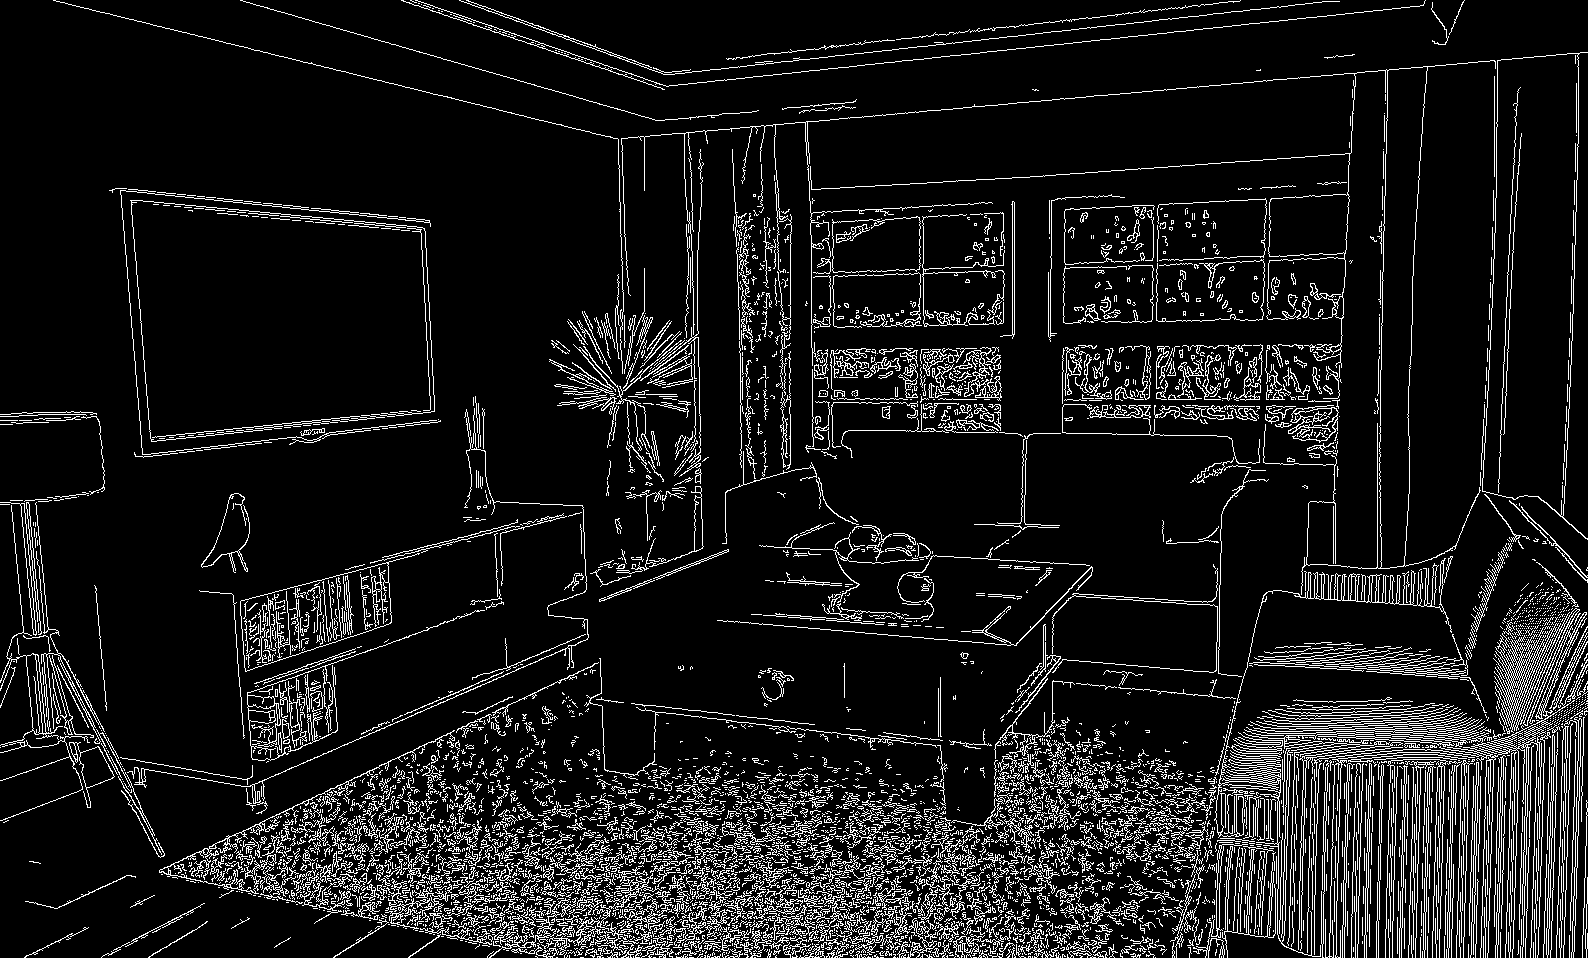

In [6]:
control

In [7]:
prompt = 'Room with blue walls and a yellow ceiling.'


In [8]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


In [9]:
!pwd

/home/featurize/mmagic


# My photo

In [11]:
# !mkdir tmp
%cd tmp
!ls

/home/featurize/mmagic/tmp
DALLE-unfinished-house-interior.png


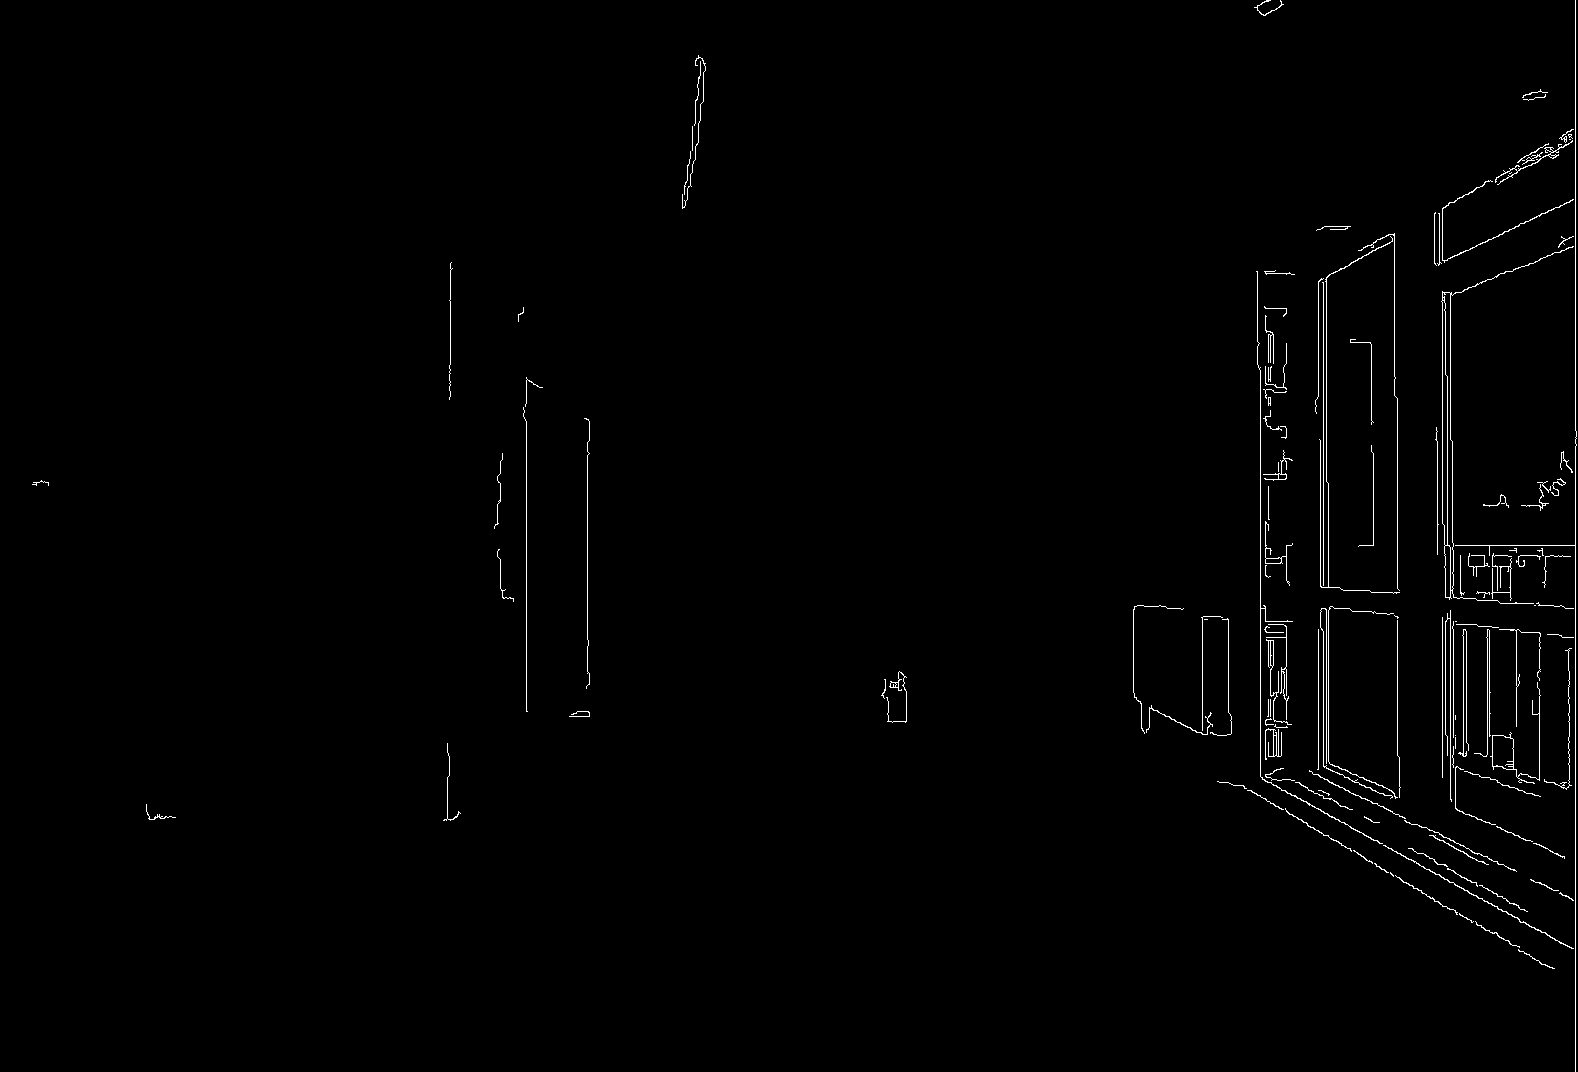

In [25]:
control_url = 'input_sample_1.png'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 50, 150)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)
control

In [26]:
prompt="""
This Northern European style interior blends simplicity, functionality, and minimalism. The design features a muted palette of whites, greys, and light woods, elegant furnishings with clean lines, natural fiber rugs, white painted wooden floors, abundant natural light, and minimalist lighting fixtures.
"""

In [27]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

100%|██████████| 20/20 [00:07<00:00,  2.62it/s]
